# Chapter 4 Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

from scipy import stats
from scipy.special import expit as logistic

np.random.seed(123)

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


## Exercise 1
***

*Re-run the first model using the petal length and then petal width variables. What are the main differences in the results? How wide or narrow is the 95% HPD interval in each case?*

In [3]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes

varnames = ['α', 'β', 'bd']

In [3]:
for feature in ["sepal_length", "petal_width", "petal_length"]:

    x_n = feature
    x_0 = df[x_n].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        α = pm.Normal('α', mu=0, sd=10)
        β = pm.Normal('β', mu=0, sd=10)

        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000,cores=1,target_accept=0.9)
        
        print("Feature {} summary".format(feature))
        print(az.summary(trace_0, varnames, credible_interval=.95))

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:01<00:00, 930.08it/s]


Feature sepal_length summary
     mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α   0.302  0.346    -0.356      0.973      0.010    0.007    1322.0  1115.0   
β   5.375  1.067     3.562      7.687      0.034    0.024    1008.0   968.0   
bd -0.055  0.064    -0.188      0.058      0.002    0.001    1511.0  1295.0   

    ess_bulk  ess_tail  r_hat  
α     1325.0    1214.0    1.0  
β     1038.0    1115.0    1.0  
bd    1527.0    1142.0    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:02<00:00, 610.84it/s]


Feature petal_width summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α    0.599  1.770    -2.764      4.130      0.068    0.051     671.0   610.0   
β   18.011  5.211     9.195     28.690      0.205    0.154     645.0   575.0   
bd  -0.036  0.092    -0.204      0.136      0.003    0.002     814.0   814.0   

    ess_bulk  ess_tail  r_hat  
α      681.0     600.0   1.01  
β      693.0     958.0   1.00  
bd     800.0     825.0   1.01  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 3 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:03<00:00, 481.50it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α    3.497  4.083    -3.213     12.032      0.210    0.164     379.0   310.0   
β   12.815  5.217     3.618     22.493      0.265    0.188     387.0   386.0   
bd  -0.273  0.278    -0.822      0.187      0.012    0.009     506.0   488.0   

    ess_bulk  ess_tail  r_hat  
α      444.0     443.0   1.01  
β      400.0     549.0   1.00  
bd     509.0     769.0   1.01  


From the results, we can see that the `bd` variable's HPD is the smallest with sepal length, and increases with petal_width and petal_length.

## Exercise 2
***

*Repeat exercise 1, this time using a Student's t-distribution as a weakly informative prior. Try different values of $\nu$.*

In [4]:
for nu in [1, 10, 30]:

    x_0 = df["petal_length"].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        # Priors have been changed
        α = pm.StudentT('α', nu=nu, mu=0, sd=10)
        β = pm.StudentT('β', nu=nu, mu=0, sd=10)


        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000,cores=1,target_accept=0.9)
        
        print(f"Feature {feature} nu {nu} summary")
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 119 divergences: 100%|██████████████████████████████████████████| 1500/1500 [00:08<00:00, 171.03it/s]
The acceptance probability does not match the target. It is 0.9954143069152399, but should be close to 0.9. Try to increase the number of tuning steps.
There were 119 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


Feature petal_length nu 1 summary
      mean       sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  \
α    3.016   10.614   -15.391     27.339      0.725    0.513     214.0   
β   89.952  187.969     3.117    420.943     22.481   15.963      70.0   
bd  -0.146    0.240    -0.675      0.199      0.018    0.013     184.0   

    ess_sd  ess_bulk  ess_tail  r_hat  
α    214.0     217.0     148.0   1.02  
β     70.0      60.0     100.0   1.03  
bd   184.0     215.0     460.0   1.01  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 1 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:02<00:00, 562.97it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 10 summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α    4.192  4.596    -3.329     14.122      0.239    0.173     369.0   356.0   
β   14.580  7.038     4.192     29.220      0.380    0.269     343.0   343.0   
bd  -0.300  0.292    -0.857      0.177      0.014    0.011     425.0   371.0   

    ess_bulk  ess_tail  r_hat  
α      411.0     510.0   1.01  
β      331.0     524.0   1.01  
bd     445.0     645.0   1.00  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 1 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:02<00:00, 546.92it/s]
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 30 summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α    3.696  4.214    -3.565     11.803      0.214    0.152     388.0   385.0   
β   14.291  6.455     3.907     26.839      0.332    0.239     378.0   364.0   
bd  -0.275  0.281    -0.812      0.197      0.013    0.009     446.0   446.0   

    ess_bulk  ess_tail  r_hat  
α      411.0     533.0   1.01  
β      420.0     391.0   1.01  
bd     479.0     958.0   1.01  


正如我们在第2章（概率编程）和第3章（使用线性回归建模）中所看到的，使用Student的t分布比使用高斯分布能产生更健壮的模型。

## Exercise 3
***

*Go back to the first example, the logistic regression for classifying setosa or versicolor given sepal length. Try to solve the same problem using a simple linear regression model, as we saw in chapter 3. How useful is linear regression compared to logistic regression? Can the result be interpreted as a probability?*

*Tip: check whether the values of $y$ are restricted to the interval [0,1].*

In [5]:
x_n = "sepal_length"
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    sd = pm.HalfNormal("sd", sd=1)

    μ = α + pm.math.dot(x_c, β)

    yl = pm.Normal('yl', mu=μ, sd=sd, observed=y_0)
    
    trace_linear = pm.sample(1000,cores=1)
    
    posterior_predictive_linear = pm.sample_posterior_predictive(trace_linear)
    print(az.summary(trace_linear, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, β, α]
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 502.98it/s]


     mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α   0.500  0.036     0.428      0.565      0.001    0.000    2847.0  2839.0   
β   0.572  0.054     0.465      0.679      0.001    0.001    2639.0  2475.0   
sd  0.350  0.025     0.302      0.399      0.000    0.000    2683.0  2653.0   

    ess_bulk  ess_tail  r_hat  
α     2839.0    1604.0    1.0  
β     2683.0    1186.0    1.0  
sd    2688.0    1674.0    1.0  


C:\Users\zhaolei\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


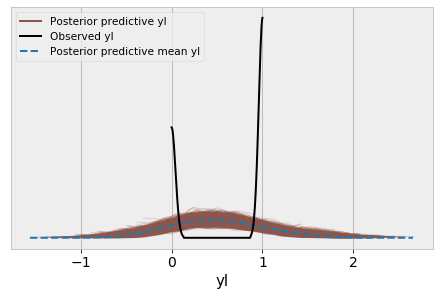

In [6]:
data = az.from_pymc3(trace=trace_linear, posterior_predictive=posterior_predictive_linear)
az.plot_ppc(data);

From the posterior predictive checks, this model is not very useful. We are trying to estimate the probability of a species given sepal_length, but a number of the posterior predictive check values are below 0 and above 1. As such, the result cannot be interpreted as a probability.

## Exercise 4
***

*In the example from the "Interpreting the coefficients of a logistic regression" section, we changed `sepal_length` by 1 unit. Using figure 4.6, corroborate that the value of `log_odds_versicolor_i` corresponds to the value of `probability_versicolor_i`. Do the same for `log_odds_versicolor_f` and `probability_versicolor_f`. Just by noting that `log_odds_versicolor_f` - `log_odds_versicolor_i` is negative, what can you say about the probability? Use figure 4.6 to help you. Is this result clear to you from the definition of log-odds?*

In [4]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_1 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_1 = df[x_n].values

In [9]:
y_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [5]:
with pm.Model() as model_1: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_1, β) 
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ))) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_1 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:23<00:00, 106.69it/s]


In [6]:
varnames = ['α', 'β'] 
summary = az.summary(trace_1, var_names=varnames)
summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-9.006,4.777,-17.470,0.199,0.139,0.100,1173.0,1140.0,1174.0,1219.0,1.0
β[0],4.676,0.906,2.890,6.252,0.026,0.019,1175.0,1119.0,1198.0,1311.0,1.0
β[1],-5.241,0.987,-7.224,-3.461,0.025,0.018,1580.0,1479.0,1638.0,1338.0,1.0


In [11]:
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

log_odds_versicolor_i = (summary['mean'] * [1, x_1, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)   #from scipy.special import expit as logistic

log_odds_versicolor_f = (summary['mean'] * [1, x_1, x_2+1]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)

print (probability_versicolor_f , probability_versicolor_i)
log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

0.00013260541894241683 0.024435006188741414


(-5.241, -0.024302400769798997)

The value of -5.22 is consistent with the summary and our "hand check". A log odds value of -5.22 means that as $x_2$ increases by one unit, the probability that the species is versicolor decreases. Or, equivalently, as sepal width increases, the probability that the flower is versicolor decreases.

We can verify this with a quick plot:

In [10]:
colors

0      blue
1      blue
2      blue
3      blue
4      blue
      ...  
95    green
96    green
97    green
98    green
99    green
Name: species, Length: 100, dtype: object

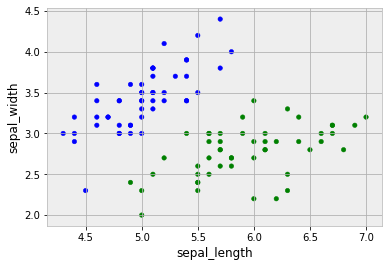

In [8]:
colors = df["species"].replace({'setosa':"blue", 'versicolor':"green"})
df.plot(kind="scatter", x="sepal_length", y="sepal_width", c=colors);

We see that, as sepal width increases from 3 to 4, we get further away from the green dots, reducing the probability that the flower we're seeing is of the versicolor species. 概率从2.4%掉到0.01%

## Question 5
***

*Use the same example from the previous exercise. For `model_1`, check how much the log-odds change when increasing `sepal_length` from 5.5 to 6.5 (spoiler: it should be 4.66). How much does the probability change? How does this increase compared to when we increase `sepal_length` from 4.5 to 5.5?*

In [36]:
# Values for sepal length are directly added in the log_odds_line
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

for i in (0,1):
    log_odds_versicolor_i = (summary['mean'] * [1, x_1 + i, x_2]).sum()
    probability_versicolor_i = logistic(log_odds_versicolor_i)


    log_odds_versicolor_f = (summary['mean'] * [1, x_1 + i + 1, x_2]).sum()
    probability_versicolor_f = logistic(log_odds_versicolor_f)

    print(f"""sepal_length_i {x_1 + i}, sepal_length_f {x_1 + i + 1}
    Log Odds Change {log_odds_versicolor_f - log_odds_versicolor_i}
    Probability Change {probability_versicolor_f - probability_versicolor_i}
    """)

sepal_length_i 4.5, sepal_length_f 5.5
    Log Odds Change 4.709999999999999
    Probability Change 0.7080309252764029
    
sepal_length_i 5.5, sepal_length_f 6.5
    Log Odds Change 4.710000000000001
    Probability Change 0.26467417655124303
    


From the calculation above we see that while the log-odds change stays constant, as it should in linear regression, the probability change is not as large from 5.5 to 6.5 as it is from 4.5 to 5.5. Looking at the graphic this intuitively makes sense as well. When sepal length is at 4.5, the chance that the species is versicolor is very small. When sepal length jumps to 5.5, this probability gets a lot bigger. This means that subsequently going from 5.5 to 6.5 still increases the probability of versicolor, but not as much - because, well, at 5.5 there is already a good chance that the species we're seeing is versicolor.

## Exercise 6
***

*In the example for dealing with unbalanced data, change `df = df[45:]` to `df = df[22:78]`. This will keep roughly the same number of data points, but now the classes will be balanced. Compare the new result with the previous ones. Which one is more similar to the example using the complete dataset?*  
在处理不平衡数据的示例中，将df = df [45：]更改为df = df [22:78]。 这将保持大致相同数量的数据点，但是现在这些类将达到平衡。 将新结果与以前的结果进行比较。 哪一个与使用完整数据集的示例更相似？

In [12]:
iris = pd.read_csv('../code/data/iris.csv')

df = iris.query("species == ('setosa', 'versicolor')") 
df = df[22:78]

y_3 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_3 = df[x_n].values

varnames = ['α', 'β'] 

In [13]:
with pm.Model() as model_3: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_3, β) 
    θ = 1 / (1 + pm.math.exp(-μ)) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_3[:,0]) 
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_3) 
 
    trace_3 = pm.sample(1000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:10<00:00, 142.49it/s]


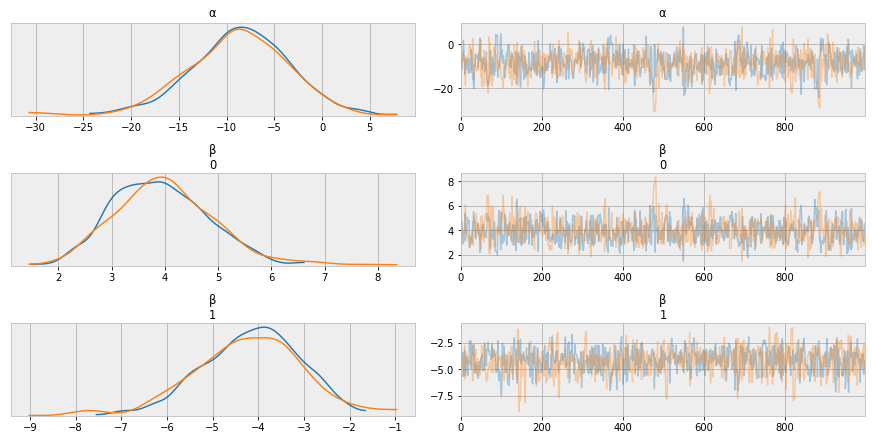

In [14]:
az.plot_trace(trace_3, varnames);

In [18]:
print(trace_3['bd'].shape,x_3[:,0].shape)

(2000, 56) (56,)


In [55]:
x_3[:,0]

array([4.6, 5.1, 4.8, 5. , 5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9,
       5. , 5.5, 4.9, 4.4, 5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6,
       5.3, 5. , 7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. ,
       5.9, 6. , 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1,
       6.4, 6.6, 6.8, 6.7])

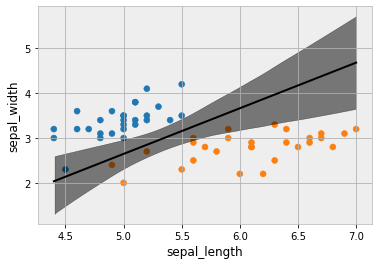

In [15]:
idx = np.argsort(x_3[:,0]) 
bd = trace_3['bd'].mean(0)[idx]

plt.scatter(x_3[:,0], x_3[:,1], c= [f'C{x}' for x in y_3]) 
plt.plot(x_3[:,0][idx], bd, color='k')

az.plot_hpd(x_3[:,0],trace_3['bd'], color='k')

plt.xlabel(x_n[0]) 
plt.ylabel(x_n[1]);

The decision boundary in this plot looks more like the unfiltered dataset as the blue data points are largely not contained in the boundary decision's 95% HPD. This indicates that the balanced model, even with less data points, is better able to distinguish between classes.此图中的决策边界看起来更像是未过滤的数据集，因为蓝色数据点在边界决策的95％HPD中基本不包含。 这表明即使数据点较少，平衡模型也能够更好地区分类别。

## Exercise 7
***

*Suppose instead of a softmax regression we use a simple linear model by coding `setosa = 0`, `versicolor = 1` and `virginica = 2`. Under the simple linear regression model, what will happen if we switch the coding? Will we get the same or different results?*

Lets run the model to have data points for a discussion:

In [60]:
#iris = sns.load_dataset('iris')
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-1]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0)) / x_s.std(axis=0)

with pm.Model() as model_s:
    α = pm.Normal('α', mu=0, sd=5, shape=3)
    β = pm.Normal('β', mu=0, sd=5, shape=(4, 3))
    μ = pm.Deterministic('μ', α + pm.math.dot(x_s, β))
    
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    
    trace_s = pm.sample(2000,cores=1)

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimension

In [61]:
print(trace_s['μ'].shape)
print(trace_s['μ'][:,0,0].mean())

(4000, 150, 3)
20.714290638926418


In [62]:
data_pred = trace_s['μ'].mean(0)
data_pred[:5]

array([[ 20.71429064,   6.51266485, -26.92381046],
       [ 17.62574514,   7.08823961, -24.38867616],
       [ 20.10498986,   6.29113277, -26.03041577],
       [ 18.96786696,   6.1043822 , -24.68783378],
       [ 21.77644085,   6.07337778, -27.52563463]])

#### Conceptual Understanding
Note the shape of the trace. The dimensions should read as follows: we have 4000 estimations of the 3 softmax class values for each of the 150 rows in the dataset.注意迹线的形状。 维度应如下所示：对于数据集中的150行，我们有3个softmax类值的4000个估计。

#### Discussion
If we changed the softmax model to a linear regression model a couple things would change. First, the interpretation of the final output would be different. A softmax prediction estimates the probability of each class, whereas a linear regression would just provide one number as an estimate for the class. The other problem is that a linear regression would output continous values across all real numbers, and how to define when one class starts and another ends is unclear.如果我们将softmax模型更改为线性回归模型，则会发生几件事。 首先，最终输出的解释会有所不同。 softmax预测估计每个类别的概率，而线性回归将仅提供一个数字作为该类别的估计。 另一个问题是线性回归会在所有实数上输出连续值，并且不清楚如何定义一个类何时开始而另一类何时结束。

## Exercise 8
***

*Compare the likelihood of the logistic model versus the likelihood of the LDA model. Use the `sample_posterior_predictive` function to generate predicted data and compare the types of data you get for both cases. Be sure you understand the difference between the types of data the model predicts.*

In [63]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')") 
y_3 = pd.Categorical(df['species']).codes 
x_n = 'sepal_length'
x_3 = df[x_n].values

Logistic Regression model (Discriminative)

In [64]:
with pm.Model() as logistic_model:
    α = pm.Normal("α", mu=0, sd=10)
    β = pm.Normal("β", mu=0, sd=10)
    μ =  α + pm.math.dot(x_3, β)
    
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    bd = pm.Deterministic("bd", -α / β )
    
    y1= pm.Bernoulli("y1", p=θ, observed=y_3)
    
    trace_logistic = pm.sample(2000,cores=1)
    ppc_logistic = pm.sample_posterior_predictive(trace_logistic)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:09<00:00, 259.95it/s]
The acceptance probability does not match the target. It is 0.9117918992769471, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.892092146794132, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:05<00:00, 749.24it/s]


Linear Discriminant Analysis (Discriminative)

In [65]:
with pm.Model() as lda_model:
    σ = pm.HalfNormal("σ", sd=10)
    μ = pm.Normal("μ", mu=0, sd=10, shape=2)
    
    setosa = pm.Normal('setosa', mu=μ[0], sd=σ, observed=x_3[:50])
    versicolor = pm.Normal("versicolor", mu=μ[1], sd=σ, observed=x_3[50:])
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    
    trace_lda = pm.sample(1000,cores=1)
    ppc_lda = pm.sample_posterior_predictive(trace_lda)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [μ, σ]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:01<00:00, 847.33it/s]
The acceptance probability does not match the target. It is 0.8835062197754676, but should be close to 0.8. Try to increase the number of tuning steps.
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 411.44it/s]


The likelihood of the logisitic regression model is as follows

$$ y \text{~} Bernoulli(\theta) $$

and the likelihood of the Linear Discriminative Analysis are

\begin{eqnarray}
Versicolor_{sepal\_length} \text{~} Normal(\mu_0, \sigma) \newline
Setosa_{sepal\_length} \text{~} Normal(\mu_1, \sigma)
\end{eqnarray}

In the logistic regression we are not estimating the properties of the sepal length. We are merely fitting parameters of the inverse link function. In the LDA model we are estimating the sepal length distributions directly.

In [72]:
ppc_logistic["y1"][0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [70]:
y_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [74]:
ppc_lda["setosa"][0]

array([4.4297893 , 5.64246678, 4.77889197, 5.30181165, 5.1420539 ,
       5.10744326, 5.11823763, 4.99065198, 5.66995743, 4.73448354,
       5.84483773, 5.0375595 , 5.54325633, 5.32343878, 4.81644208,
       5.46516705, 4.62688578, 4.6054698 , 4.09925428, 4.93220357,
       5.37722965, 4.89600715, 5.75311056, 5.12780735, 4.93886506,
       4.54426986, 4.65191177, 5.26184933, 4.63656699, 5.75405569,
       5.05104983, 5.24892776, 5.05655069, 5.21108877, 5.22469945,
       5.48457826, 5.16406603, 4.89805947, 4.80755936, 5.31398904,
       5.62331936, 5.1903452 , 4.96401973, 4.79965042, 4.64752244,
       4.97195608, 5.11734843, 5.0168921 , 4.41418109, 4.93889411])

When comparing the posterior predictive, it can be seen that the logistic model is binary, estimating either 0 or 1, while the LDA model has real numbers that generally look like sepal lengths. This follows our understandings of the models: the logistic regression makes predictions as to which class a particular sepal length belongs to, whereas the LDA model makes predictions about the sepal lengths directly.比较后验预测时，可以看出逻辑模型是二元模型，估计为0或1，而LDA模型具有通常看起来像萼片长度的实数。 这遵循了我们对模型的理解：逻辑回归对特定的萼片长度属于哪个类别进行预测，而LDA模型直接对萼片长度进行预测。

## Exercise 9
***

*Using the fish data, extend the `ZIP_reg` model to include the persons variable as part of a linear model. Include this variable to model the number of extra zeros. You should get a model that includes two linear models: one connecting the number of children and the presence/absence of a camper to the Poisson rate (as in the example we saw), and another connecting the number of persons to the $\psi$ variable. For the second case, you will need a logistic inverse link!*

使用鱼类数据，扩展ZIP_reg模型，使其包含人员变量作为线性模型的一部分。 包括此变量以建模额外零的数量。 您应该得到一个包含两个线性模型的模型：一个将孩子的数量和露营者的存在与否与泊松率联系起来（如我们所看到的示例），另一个将人数与𝜓变量联系起来。 对于第二种情况，您将需要逻辑逆向链接！

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β_person, α_person, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:06<00:00, 216.72it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Arg

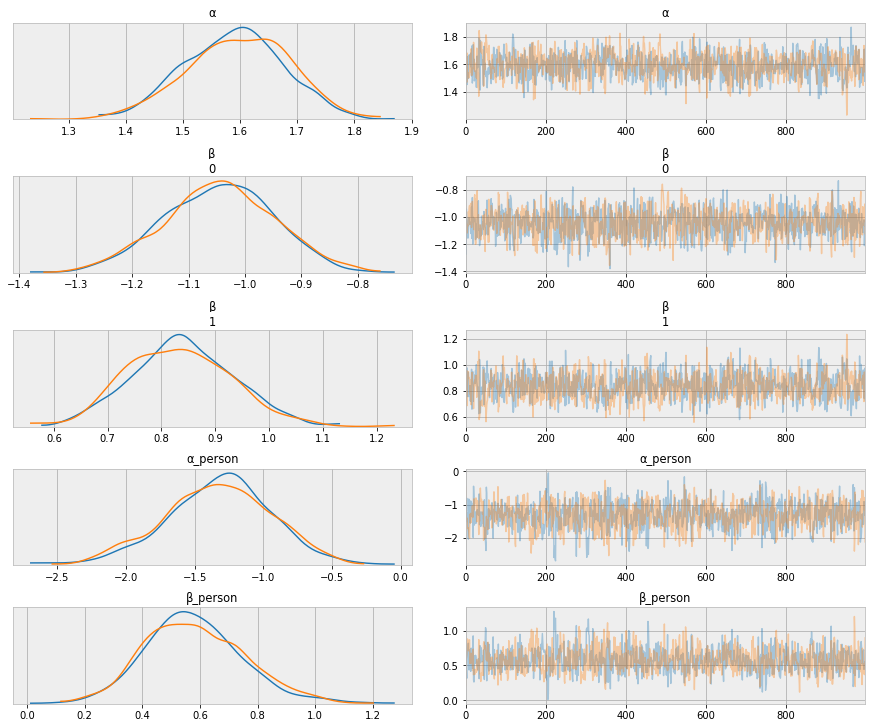

In [73]:
fish_data = pd.read_csv('../code/data/fish.csv')

with pm.Model() as ZIP_reg:
    # ψ = pm.Beta('ψ', 1, 1)
    α = pm.Normal('α', 0, 10)
    β = pm.Normal('β', 0, 10, shape=2)
    
    θ = pm.math.exp(α + β[0] * fish_data['child'] + β[1] * fish_data['camper'])
    
    α_person = pm.Normal('α_person', 0, 10)
    β_person = pm.Normal('β_person', 0, 10)
    ψ = pm.math.sigmoid(α_person + β_person * fish_data['persons'])
    
    yl = pm.ZeroInflatedPoisson('yl', ψ, θ, observed=fish_data['count'])
    
    trace_ZIP_reg = pm.sample(1000,cores=1)
    
az.plot_trace(trace_ZIP_reg);

In [75]:
az.summary(trace_ZIP_reg)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,1.593,0.088,1.423,1.745,0.003,0.002,951.0,945.0,946.0,1057.0,1.0
β[0],-1.046,0.097,-1.218,-0.856,0.003,0.002,1325.0,1324.0,1325.0,1083.0,1.0
β[1],0.837,0.095,0.658,1.009,0.003,0.002,962.0,962.0,954.0,1096.0,1.0
α_person,-1.328,0.386,-2.076,-0.623,0.013,0.010,868.0,792.0,889.0,938.0,1.0
β_person,0.582,0.170,0.284,0.928,0.006,0.004,878.0,805.0,907.0,886.0,1.0


## Exercise 10
***

*Use the data for the robust logistic example to feed a non-robust logistic regression model and to check that the outliers actually affected the results. You may want to add or remove outliers to better understand the effect of the estimation on a logistic regression and the robustness of the model introduced in this chapter.*将数据用于稳健的逻辑模型示例，以提供非稳健的逻辑回归模型并检查异常值是否实际影响了结果。 您可能想要添加或删除异常值，以更好地了解估计对逻辑回归的影响以及本章介绍的模型的健壮性。

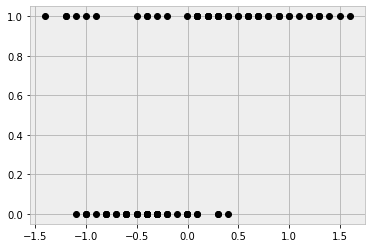

In [3]:
#iris = sns.load_dataset("iris") 
df = iris.query("species == ('setosa', 'versicolor')") 

y_0 = pd.Categorical(df['species']).codes 
x_n = 'sepal_length'  
x_0 = df[x_n].values 
y_0 = np.concatenate((y_0, np.ones(6, dtype=int))) 
x_0 = np.concatenate((x_0, [4.2, 4.5, 4.0, 4.3, 4.2, 4.4])) 
x_c = x_0 - x_0.mean() 

plt.plot(x_c, y_0, 'o', color='k');

Let's take the robust logistic regression from the chapter and make it non robust:

In [17]:
with pm.Model() as non_rlg:
    α = pm.Normal("α", mu=0, sd=10)
    β = pm.Normal("β", mu=0, sd=10)
    μ = α + β * x_c
    
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    bd = pm.Deterministic("bd", -α/β)
    
    # Short Circuit Robust regression
    # π = pm.Beta("π", 1, 1)
    # p = π *.5 + (1-π)*θ
    p = θ
    
    y = pm.Bernoulli("y", p=p, observed=y_0)
    
    trace_rlg = pm.sample(10000,tune=5000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|██████████████████████████████████████████| 15000/15000 [00:15<00:00, 984.23it/s]


In [18]:
varnames = ['α', 'β', 'bd']
az.summary(trace_rlg, varnames)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,0.228,0.244,-0.213,0.700,0.002,0.002,14217.0,10544.0,14260.0,12219.0,1.0
β,2.367,0.478,1.489,3.268,0.004,0.003,14699.0,14091.0,14926.0,13904.0,1.0
bd,-0.097,0.106,-0.302,0.097,0.001,0.001,14190.0,12442.0,14163.0,13217.0,1.0


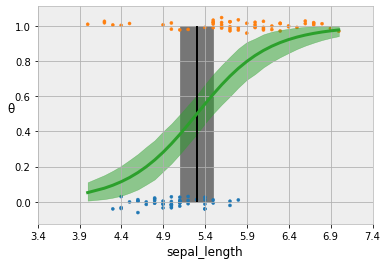

In [25]:
theta = trace_rlg['θ'].mean(axis=0)
idx = np.argsort(x_c)

plt.vlines(trace_rlg['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_rlg['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
theta_hpd = az.hpd(trace_rlg['θ'])[idx]
plt.fill_between(x_c[idx], theta_hpd[:,0], theta_hpd[:,1], color='C2', alpha=0.5)

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)

# use original scale for xticks
locs, _ = plt.xticks() 
plt.xticks(locs, np.round(locs + x_0.mean(), 1))
plt.savefig('B11197_04_13.png', dpi=300);

Compare this plot to figure 4.13. Note that the HPD for the decision boundary is wider, reflecting the additional uncertainty. This is also reflected in the slope which is more gradual. This is reflected both in the plot, but also the beta parameter (15.77 for robust model versus 2.38 for the non-robust model).将此图与图4.13进行比较。 请注意，决策边界的HPD较宽，反映了额外的不确定性。 这也反映在更平缓的坡度上。 这既反映在图中，也反映在beta参数中（稳健模型为15.77，非稳健模型为2.38）。

In [26]:
theta[idx]

array([0.05199836, 0.0770595 , 0.0770595 , 0.09366271, 0.09366271,
       0.11362882, 0.11362882, 0.11362882, 0.11362882, 0.13748105,
       0.13748105, 0.16573455, 0.16573455, 0.16573455, 0.16573455,
       0.19884274, 0.19884274, 0.23712215, 0.23712215, 0.23712215,
       0.23712215, 0.23712215, 0.28065878, 0.28065878, 0.28065878,
       0.28065878, 0.28065878, 0.32920898, 0.32920898, 0.32920898,
       0.32920898, 0.32920898, 0.32920898, 0.32920898, 0.32920898,
       0.32920898, 0.32920898, 0.38211962, 0.38211962, 0.38211962,
       0.38211962, 0.38211962, 0.38211962, 0.38211962, 0.38211962,
       0.38211962, 0.43830174, 0.43830174, 0.43830174, 0.43830174,
       0.49628874, 0.55438698, 0.55438698, 0.55438698, 0.55438698,
       0.55438698, 0.55438698, 0.61088939, 0.61088939, 0.61088939,
       0.61088939, 0.61088939, 0.61088939, 0.61088939, 0.66429239,
       0.66429239, 0.66429239, 0.66429239, 0.66429239, 0.71345525,
       0.71345525, 0.71345525, 0.71345525, 0.71345525, 0.71345

In [11]:
# Quadratic Model
with pm.Model() as space_flu_model:
    α = pm.Normal("α", 0,1)
    β = pm.Normal("β", 0,1, shape=2)
    
    # Quadratic Parmetarization is in this line
    μ = α + pm.math.dot(x_c, β[0]) + pm.math.dot(x_c**2, β[1])
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    
    # bd = pm.Deterministic('bd', -α/β)
    
    y = pm.Bernoulli("y", p=θ, observed=y_0 )
    flu_logistic_trace = pm.sample(10000,tune=5000,cores=1,init="adapt_diag")
    flu_logistic_samples  = pm.sample_posterior_predictive(flu_logistic_trace, vars=[θ,y], samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
Sampling chain 1, 0 divergences: 100%|██████████████████████████████████████████| 15000/15000 [00:19<00:00, 751.28it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 643.20it/s]


Text(0, 0.5, 'θ')

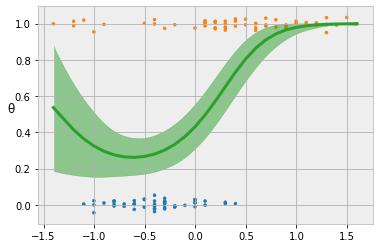

In [23]:
# Plot observed value
plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])

# Plot mean of parameter estimate
theta = flu_logistic_trace['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)

# Plot confidence of parameter estimate
az.plot_hpd(x_c, flu_logistic_trace['θ'], color='C2')

plt.ylabel('θ', rotation=0)

In [24]:
 theta[idx]

array([0.53642655, 0.41402669, 0.41402669, 0.36446816, 0.36446816,
       0.3249116 , 0.3249116 , 0.3249116 , 0.3249116 , 0.29548739,
       0.29548739, 0.27562209, 0.27562209, 0.27562209, 0.27562209,
       0.26455259, 0.26455259, 0.2616824 , 0.2616824 , 0.2616824 ,
       0.2616824 , 0.2616824 , 0.26676918, 0.26676918, 0.26676918,
       0.26676918, 0.26676918, 0.27999629, 0.27999629, 0.27999629,
       0.27999629, 0.27999629, 0.27999629, 0.27999629, 0.27999629,
       0.27999629, 0.27999629, 0.30196942, 0.30196942, 0.30196942,
       0.30196942, 0.30196942, 0.30196942, 0.30196942, 0.30196942,
       0.30196942, 0.33363851, 0.33363851, 0.33363851, 0.33363851,
       0.37609791, 0.43018253, 0.43018253, 0.43018253, 0.43018253,
       0.43018253, 0.43018253, 0.49579506, 0.49579506, 0.49579506,
       0.49579506, 0.49579506, 0.49579506, 0.49579506, 0.57105844,
       0.57105844, 0.57105844, 0.57105844, 0.57105844, 0.65172829,
       0.65172829, 0.65172829, 0.65172829, 0.65172829, 0.65172

In [20]:
az.compare({'model_l':trace_rlg,'model_p':flu_logistic_trace},
                    method='BB-pseudo-BMA') 

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_p,0,-47.1787,1.89377,0,0.992534,6.32925,0,False,log
model_l,1,-56.7791,2.59414,9.60043,0.00746561,3.53691,4.33072,False,log


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DD5C000F0>,
      dtype=object)

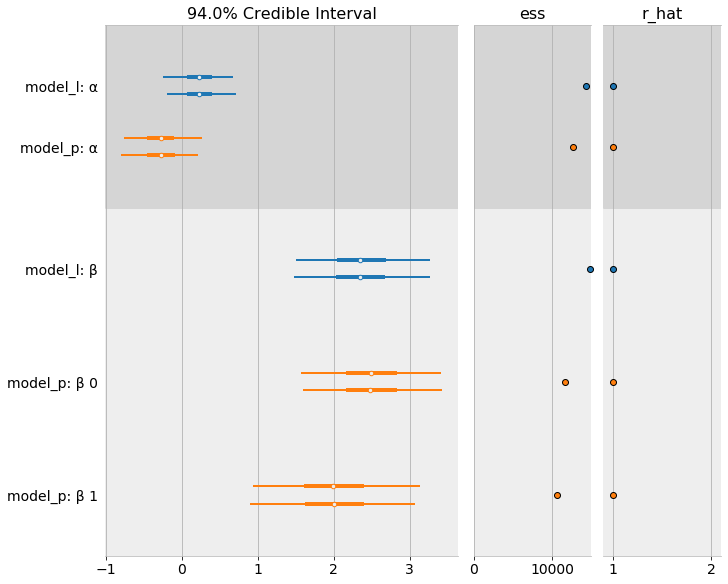

In [21]:
az.plot_forest([trace_rlg, flu_logistic_trace], model_names=['model_l', 'model_p'],
               var_names=['α', 'β'], r_hat=True,ess=True)

## Exercise 11
***

*Read and run the following notebooks from PyMC3's documentation:*

- [GLM: Linear regression](https://docs.pymc.io/notebooks/GLM-linear.html)
- [GLM: Robust Linear Regression](https://docs.pymc.io/notebooks/GLM-robust.html)
- [GLM: Hierarchical Linear Regression](https://docs.pymc.io/notebooks/GLM-hierarchical.html)

### The Inference Button: Bayesian GLMs made easy with PyMC3
Y=Xβ+ϵ  然后，我们可以使用普通最小二乘或最大似然来找到最佳拟合β。

Probabilistic Reformulation¶
Bayesians take a probabilistic view of the world and express this model in terms of probability distributions. Our above linear regression can be rewritten to yield:贝叶斯主义者以概率论的眼光看待世界，并用概率分布来表达这种模型。我们上面的线性回归可以重写为：

Y∼N(Xβ,σ2)
In words, we view Y as a random variable (or random vector) of which each element (data point) is distributed according to a Normal distribution. The mean of this normal distribution is provided by our linear predictor with variance σ2.换句话说，我们将Y视为随机变量（或随机向量），其每个元素（数据点）均根据正态分布进行分布。该正态分布的平均值由方差为σ2的线性预测器提供。

While this is essentially the same model, there are two critical advantages of Bayesian estimation:

Priors: We can quantify any prior knowledge we might have by placing priors on the paramters. For example, if we think that σ is likely to be small we would choose a prior with more probability mass on low values.先验：我们可以通过将先验放在参数上来量化我们可能拥有的任何先验知识。例如，如果我们认为σ可能很小，那么我们会选择一个低概率值质量更大的先验。

Quantifying uncertainty: We do not get a single estimate of β as above but instead a complete posterior distribution about how likely different values of β are. For example, with few data points our uncertainty in β will be very high and we’d be getting very wide posteriors.量化不确定性：我们没有得到如上所述的β单个估计值，而是关于β不同值的可能性的完整后验分布。例如，只有很少的数据点，我们对β的不确定性将非常高，我们的后验将变得非常广泛。

In [80]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

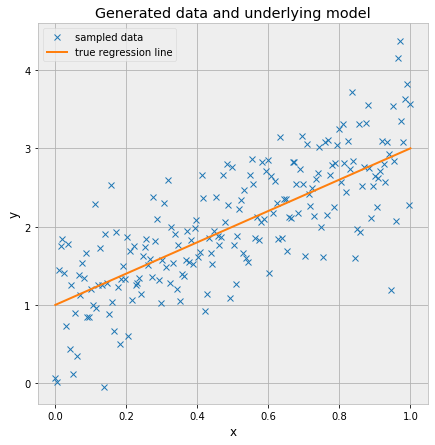

In [81]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

让我们将贝叶斯线性回归模型拟合到此数据。 如您所见，PyMC3中的模型规格包含在with语句中。

在这里，我们使用了很棒的新NUTS采样器（我们的推断按钮）来绘制2000个后验样本。

In [85]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sigma=20)
    x_coeff = pm.Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = pm.sample(3000, cores=1) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [x, Intercept, sigma]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 3500/3500 [00:05<00:00, 638.53it/s]


对于熟悉概率编程的人来说，这应该是相当可读的。 但是，我的非统计人员朋友会知道这一切吗？ 此外，回想一下，这是一个非常简单的模型，在R中只是一行。拥有多个可能转换的回归变量，交互项或链接函数也将使其更加复杂且易于出错。
相反，新的glm（）函数采用了Patsy线性模型说明符，从中可以创建设计矩阵。 然后glm（）为每个系数添加随机变量，并为模型添加适当的可能性。

In [87]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(3000, cores=1) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 3500/3500 [00:05<00:00, 635.75it/s]


简短得多，但是此代码执行的功能与上述模型规范完全相同（如果需要，您可以更改先验和其他所有内容）。 glm（）解析Patsy模型字符串，为每个回归变量添加随机变量（在这种情况下为“截距”和“斜率x”），添加似然性（默认情况下，选择“正态分布”），以及所有其他变量（sigma）。 最后，glm（）然后通过使用statsmodels估计一个频繁线性模型来将参数初始化为一个好的起点。

如果您不熟悉R的语法，则'y〜x'指定我们有一个输出变量y，我们希望将其估计为x的线性函数。

贝叶斯推论并不仅给我们一条最佳拟合线（最大似然法），而且还给了我们可能参数的整个后验分布。 让我们绘制参数的后验分布以及绘制的各个样本。

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

<Figure size 504x504 with 0 Axes>

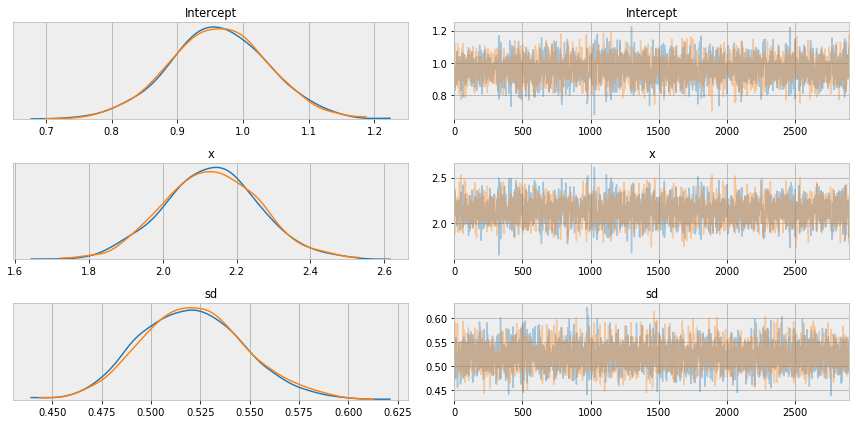

In [88]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();

左侧显示了边际后验–对于x轴上的每个参数值，我们在y轴上都有一个概率，该概率告诉我们该参数值的可能性。

这里有几件事情要看。 首先是我们针对各个参数（左侧）的采样链似乎收敛且平稳（没有大的漂移或其他奇数模式）。

其次，每个变量的最大后验估计（左侧分布中的峰值）非常接近用于生成数据的真实参数（x是回归系数，而sigma是我们正态分布的标准偏差）。

因此，在GLM中，我们不仅有一条最佳拟合回归线，而且还有许多。 后验预测图从后验中获取多个样本（截距和斜率），并为它们中的每一个绘制一条回归线。 在这里，我们为此使用了plot_posterior_predictive_glm（）便捷函数。

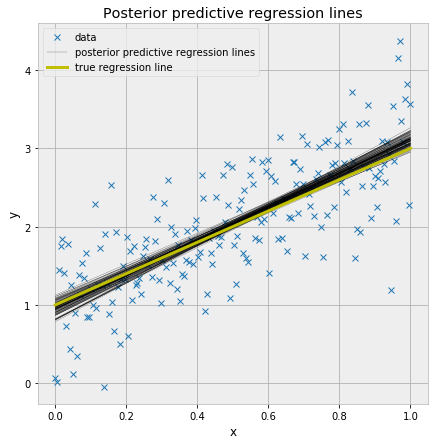

In [90]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

如您所见，我们的估计回归线与真实回归线非常相似。 但是由于我们只有有限的数据，因此我们的估计值存在不确定性，这里用线的可变性表示。

### 摘要¶
当前，可用性是广泛采用贝叶斯统计数据的巨大障碍。

PyMC3允许GLM规范具有从R借来的方便语法。

后验预测图使我们能够评估拟合度和不确定性。

### This world is far from Normal(ly distributed): Robust Regression in PyMC3

在这篇博客文章中，我将写以下内容：

几个离群值如何在很大程度上影响线性回归模型的拟合。

如何用Student T分布代替正态似然会产生稳健的回归。

通过传递族对象，如何使用PyMC3及其新的glm模块轻松完成此操作。

这是关于贝叶斯GLM的系列文章的第二部分（有关线性回归的第一部分，请点击此处）。在之前的这篇文章中，我描述了如何最小化回归线的平方距离与最大化正态分布的可能性以及平均值来自回归线的可能性。后一种概率表达式使我们能够轻松地制定贝叶斯线性回归模型。

这在模拟数据上非常出色。不过，模拟数据的问题在于它是模拟的。在现实世界中，事情往往变得更加混乱，并且一些异常值很容易违反正常性这样的假设。

让我们看看如果在上一篇文章的模拟数据中添加一些离群值会发生什么。

In [91]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

# Add outliers
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

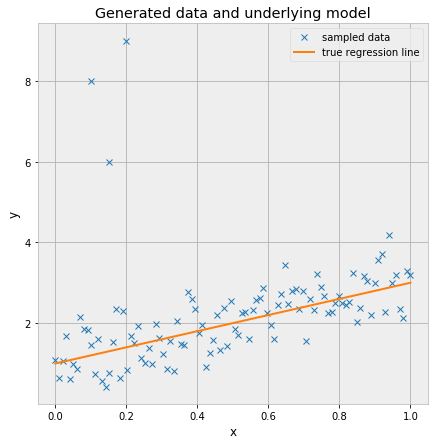

In [92]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x_out, y_out, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

Lets see what happens if we estimate our Bayesian linear regression model using the glm() function as before. This function takes a `Patsy <http://patsy.readthedocs.org/en/latest/quickstart.html>`__ string to describe the linear model and adds a Normal likelihood by default.

In [93]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(2000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:04<00:00, 612.58it/s]


为了评估拟合程度，我通过从后验分布中获取回归参数并为每一个绘制回归线来绘制后验预测回归线（这全部在plot_posterior_predictive（）内部完成）。

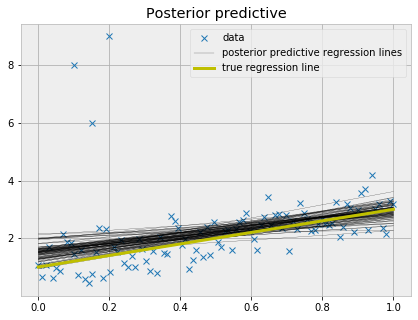

In [94]:
plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')

plt.legend(loc=0);

如您所见，拟合度非常偏斜，并且我们的估计中存在相当多的不确定性，这由大量不同的后验预测回归线表明。 为什么是这样？ 原因是正态分布的尾部没有很多质量，因此，异常值会严重影响拟合。

频率论者会估计鲁棒回归，并使用非二次距离度量来评估拟合。

但是贝叶斯怎么办？ 由于问题在于正态分布的尾巴，因此我们可以假设我们的数据不是正态分布，而是根据学生T分布进行分布，后者具有较重的尾巴，如下所示（我在“ The Kruschke”中了解了这一技巧， aka小狗书；但我认为Gelman是第一个提出此书的人。

让我们看一下这两种分布，以了解它们。

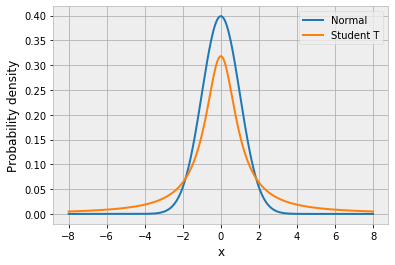

In [96]:
import theano
normal_dist = pm.Normal.dist(mu=0, sigma=1)
t_dist = pm.StudentT.dist(mu=0, lam=1, nu=1)
x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();

正如您所看到的，在T分布下比在正态分布下，远离均值（在这种情况下为0）的值的可能性更大。

要定义PyMC3中T分布的用法，我们可以传递一个家庭对象T，该对象指定我们的数据是学生T分布的（更多选择请参见glm.families）。 请注意，这与R和statsmodels使用的语法相同。

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lam, x, Intercept]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:04<00:00, 609.75it/s]


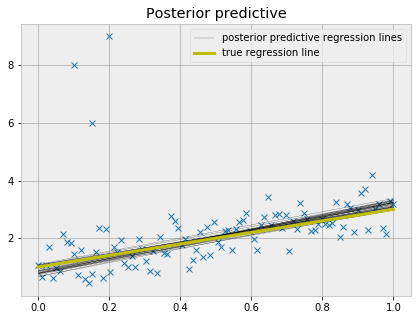

In [97]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x', data, family=family)
    trace_robust = pm.sample(2000, cores=1)

plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x')
pm.plot_posterior_predictive_glm(trace_robust,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')
plt.legend();

在那里，好多了！离群值几乎不会影响我们的估计，因为我们的似然函数假设离群值比正态分布下的可能性大得多。

### 摘要¶
PyMC3的glm（）函数允许您传入包含有关可能性的信息的族对象。

通过将似然性从正态分布更改为学生T分布（尾部具有更大的质量），我们可以执行稳健回归。

下一篇文章将介绍PyMC3中的逻辑回归以及后验和燕麦片的共同点。

扩充功能：

除均值和方差外，Student-T分布还具有称为自由度的第三个参数，该参数描述应在尾巴中放多少质量。此处将其设置为1，以赋予尾巴最大质量（将其设置为无穷大将导致正态分布！）。一个人可以很容易地将它放在先行而不是固定它，我留给读者作为练习；）。

T分布也可以用作先验。我将在以后有关分层GLM的文章中对此进行展示。

### The Best Of Both Worlds: Hierarchical Linear Regression in PyMC3
本教程改编自Danne Elbers和Thomas Wiecki的博客文章，“两全其美：PyMC3中的分层线性回归”。

今天的博客文章由Danne Elbers共同撰写，她正在与我一起完成有关使用贝叶斯建模的计算精神病学的硕士论文。该帖子还大量借鉴了Chris Fonnesbeck的笔记本。

当我第一次被引入层次建模时，贝叶斯建模的力量真的让我大吃一惊。在此博客文章中，我们将：

提供直观的分层/多级贝叶斯建模说明；

展示如何在PyMC3中轻松构建和评估此类模型；

通过比较两者，展示使用分层贝叶斯建模相对于非分层贝叶斯建模的优势；

可视化“收缩效果”（如下所述）；并突出显示该模型的频率版。

总是有多组相关的度量值出现。例如，在数学心理学中，您要在同一任务上测试多个科目。然后，我们想要估计一个通过一组参数描述任务行为的计算/数学模型。因此，假设他们没有相似之处，我们可以对每个主题分别拟合模型。或者，合并所有数据并假设所有主题都相同，则估计一个模型。层次建模通过对主题的相似性进行建模来实现两全其美，同时也可以估计各个参数。顺便说一句，我们实验室的软件HDDM允许对广泛使用的心理学决策模型进行分层贝叶斯估计。但是，在此博客文章中，我们将使用分层线性回归的更经典示例来预测房屋中的氡水平。

Gelman等人（2007）的ra气数据集是分层建模的经典之作。 在此数据集中，已测量了多个州所有县中不同家庭之间的放射性气体ra含量。 在非吸烟者中，气是引起肺癌的最高原因。 据认为，它在有地下室的家庭中更常见，并且在土壤类型之间的含量也不同。 在这里，我们将调查这种差异，并根据县本身和地下室的存在来预测不同县的ra水平。 在此示例中，我们将考察明尼苏达州，该州包含85个县，在该县进行了不同的测量，每个县的测量范围从2到116个。

In [98]:
data = pd.read_csv(pm.get_data('radon.csv'))
data['log_radon'] = data['log_radon'].astype(theano.config.floatX)
county_names = data.county.unique()
county_idx = data.county_code.values

n_counties = len(data.county.unique())

In [107]:
county_idx 

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       19, 19, 19, 20, 20

In [99]:
data[['county', 'log_radon', 'floor']].head()

,county,log_radon,floor
0,AITKIN,0.832909,1.0
1,AITKIN,0.832909,0.0
2,AITKIN,1.098612,0.0
3,AITKIN,0.095310,0.0
4,ANOKA,1.163151,0.0


如您所见，在一个县中，我们进行了多次measurements测量（对数转换为实线）–每个房屋一行–房屋是否有地下室（地板== 0）（地板== 0） 1）。 我们对拥有地下室是否会增加房子中测得的ra感兴趣。

现在您可能会说：“那很容易！ 我将汇总所有数据并估计一个大回归，以评估地下室对所有县的影响。” 用数学的话讲，该模型是：

$radoni,c=α+β∗floori,c+ϵ$

在i代表测量值的情况下，如果房屋有地下室，则县和楼层分别包含0或1。 如果您需要有关PyMC中线性回归的复习，请查看我以前的博客文章。 至关重要的是，如下图所示，我们仅针对所有汇聚县的所有度量值估计一个截距和一个斜率（在我们的案例中，θ表示（α，β），yi是第i个县的度量值）。

未合并的度量：单独的回归¶
但是，如果我们对不同县实际上是否具有不同的关系（坡度）和不同的base基率（拦截）感兴趣，该怎么办？ 然后您可能会说：“好吧，我只估算n个（县的数量）不同的回归-每个县一个”。 用数学的话讲，该模型是：

$radoni,c=αc+βc∗floori,c+ϵ_c$

这是极端相反的模型。 在上面我们假设所有县都完全相同的地方，在这里我们说的是它们之间没有任何相似之处。 如下所示，当每个县的数据很少时，这种类型的模型可能会非常嘈杂，就像该数据集中的情况一样。

### 局部池化：又称分层回归，两全其美
幸运的是，这两个极端都有中间立场。 具体来说，我们可以假设尽管每个县县的αs和βs都不同（如非合并案例），但系数都具有相似性。 我们可以通过假设每个系数都来自一个共同的组分布来对此建模：

αc∼N(μα,σ2α)
 
βc∼N(μβ,σ2β)

因此，我们假设截距α和斜率β来自以正态分布为中心的正态分布，正态分布以各自的均值μ为中心，且具有一定的标准偏差σ2，我们也估计了这些值（或更确切地说是后验）。 这就是为什么将其称为多级，分层或部分池建模的原因。

![title](e_4.png)

我们如何估算您可能会问的复杂模型？ 嗯，这就是概率编程的美–我们只要制定所需的模型，然后按我们的推理按钮（TM）。

（请注意，由于我们尚未定义先验或超先验条件（即分组分布的先验条件μ和σ），因此上述内容并不是完整的贝叶斯模型规范。它们将在下面的模型实现中使用，但仅在此处进行分心。）

概率编程
非池化/非分层模型
为了强调分层线性回归的效果，我们首先将从上方估算非分层，未合并的贝叶斯模型（单独的回归）。 对于每个县，我们估计一个完全独立的均值（截距）。 由于我们没有关于拦截或回归的可能信息，因此我们将使用以0为中心，正态分布较大的正态分布来描述拦截和回归。 我们假设测量值呈正态分布并带有噪声ϵ，然后将其均匀分布。

In [101]:
with pm.Model() as unpooled_model:

    # Independent parameters for each county
    a = pm.Normal('a', 0, sigma=100, shape=n_counties)
    b = pm.Normal('b', 0, sigma=100, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5)

    # Model prediction of radon level
    # a[county_idx] translates to a[0, 0, 0, 1, 1, ...],
    # we thus link multiple household measures of a county
    # to its coefficients.
    radon_est = a[county_idx] + b[county_idx]*data.floor.values

    # Data likelihood
    y = pm.Normal('y', radon_est, sigma=eps, observed=data.log_radon)

In [102]:
with unpooled_model:
    unpooled_trace = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [eps, b, a]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:12<00:00, 200.92it/s]


层次模型
分层模型没有创建分离的模型，而是创建了组参数，该组参数考虑的县并不完全不同，而是具有潜在的相似性。 这些分布随后用于影响每个县的α和β的分布。

In [103]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    radon_est = a[county_idx] + b[county_idx]*data.floor.values

    # Data likelihood
    radon_like = pm.Normal('radon_like', mu=radon_est,
                           sigma=eps, observed=data.log_radon)

In [104]:
# Inference button (TM)!
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [eps, b, a, sigma_b, mu_b, sigma_a, mu_a]
Sampling chain 1, 3 divergences: 100%|████████████████████████████████████████████| 4000/4000 [00:34<00:00, 117.23it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


绘制分层模型跟踪-其发现的值-从2000年开始迭代（右侧图）及其累积的边际值（左侧图）

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

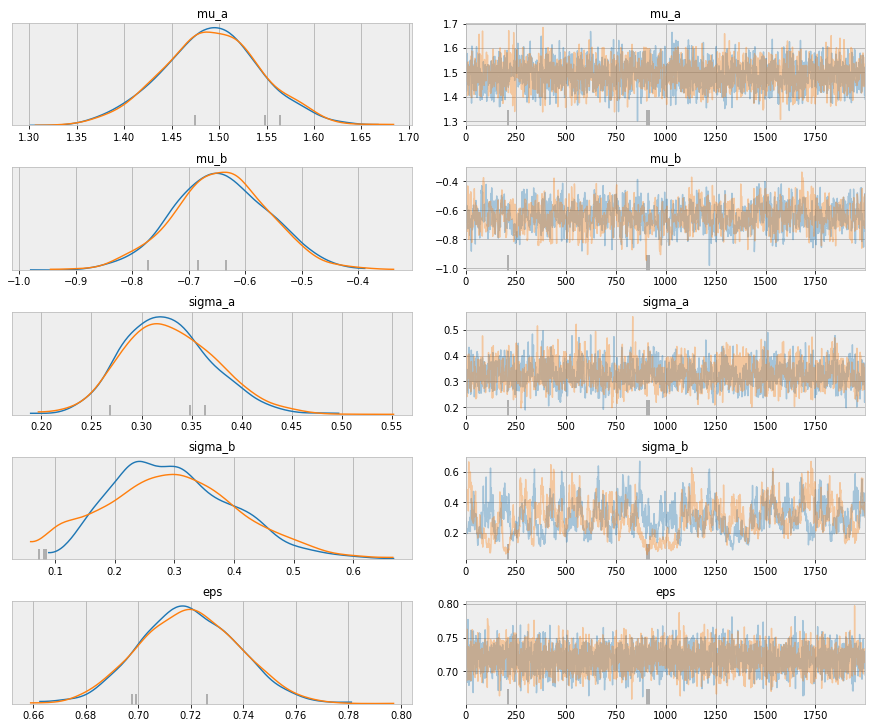

In [105]:
pm.traceplot(hierarchical_trace,
             var_names=['mu_a', 'mu_b',
                        'sigma_a', 'sigma_b',
                        'eps']);

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

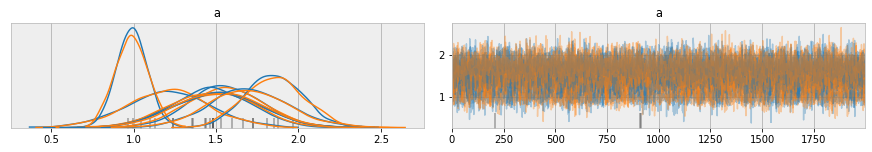

In [108]:
pm.traceplot(hierarchical_trace,
             var_names=['a'], coords={'a_dim_0': range(8)});

左栏中的边缘后验具有丰富的信息。 mu_a告诉我们该组的平均（对数）ra水平。 mu_b告诉我们，没有地下室会显着降低ra水平（没有质量高于零）。 我们还可以通过查看边距来发现，各县之间的ra水平存在很大差异（每个“彩虹”颜色对应一个县）； 不同的宽度与我们对每个参数估算值的置信度有关–每个县的测量值越多，我们的置信度就越高。

### 后验预测检查
均方根偏差
为了找出哪个模型可以更好地解释数据，我们可以计算均方根偏差（RMSD）。 此后验预测检查围绕基于在链中不同时刻发现的参数重新创建数据。 随后将重新创建或预测的值与实际数据点进行比较，将数据点预测为更接近原始数据的模型被认为是更好的模型。 因此，RMSD越低越好。

计算RMSD（代码未显示）时，我们得到以下结果：

个体/非层次模型：0.13

层次模型：0.08

从上面可以看出，层次模型在预测values值方面比非层次模型更好。 接下来，我们将绘制一些县的示例，这些示例显示实际的measurements测量值，等级预测和非等级预测。

C:\Users\zhaolei\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


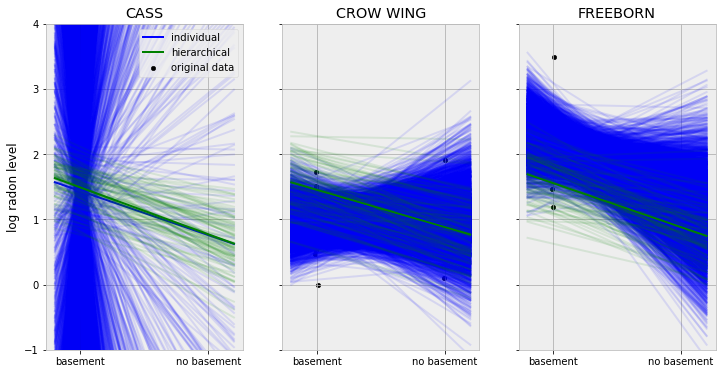

In [109]:
selection = ['CASS', 'CROW WING', 'FREEBORN']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = data[data.county == c]
    c_data = c_data.reset_index(drop=True)
    c_index = np.where(county_names == c)[0][0]
    z = list(c_data['county_code'])[0]

    xvals = np.linspace(-0.2, 1.2)
    for a_val, b_val in zip(unpooled_trace['a'][:, c_index], unpooled_trace['b'][:, c_index]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.1)
    axis[i].plot(xvals, unpooled_trace['a'][:, c_index].mean() + unpooled_trace['b'][:, c_index].mean() * xvals,
                 'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['a'][z], hierarchical_trace['b'][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.1)
    axis[i].plot(xvals, hierarchical_trace['a'][z].mean() + hierarchical_trace['b'][z].mean() * xvals,
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.floor + np.random.randn(len(c_data))*0.01, c_data.log_radon,
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0, 1])
    axis[i].set_xticklabels(['basement', 'no basement'])
    axis[i].set_ylim(-1, 4)
    axis[i].set_title(c)
    if not i % 3:
        axis[i].legend()
        axis[i].set_ylabel('log radon level')

在上图中，我们将三个选定县的数据点设为黑色。粗线代表个体（蓝色）和层次模型（绿色）的回归线的平均估计。较细的线是来自后验的单个样本的回归线，使我们对估计值的可变性有所了解。

当查看县的“ CASS”时，我们看到非层次估计有很大的偏见：因为该县的数据仅包含有地下室的家庭，所以估计的回归会产生负负斜率的无意义的结果，这意味着我们期望负数没有地下室的房屋中的levels水平！

此外，在示例县的“ CROW WING”和“ FREEBORN”中，非分层模型似乎比分层模型对数据集中异常值的反应更强烈（“ CROW WING”：无地下室右上角。“ FREEBORN” ：地下室左上角）。假设在地下室相对于没有地下室的家庭中可以测量到更多的ra气，县“ CROW WING”的非分层模式似乎已经消失。有了群体分布约束系数，我们在所有情况下都会得到有意义的估计，因为我们将从群体中学到的知识应用于个人，反之亦然。

### 收缩率¶
收缩率描述了由于共同的群体分布而将我们的估计“拉”到群体均值的过程–在正态性假设下，与群体均值相差很远的县系数具有非常低的概率，从而使它们更接近于均值。 小组平均值给予他们更高的可能性。 在非分层模型中，仅通过使用每个县的数据，每个县就可以与其他县完全不同，从而导致模型更容易出现异常值（如上所示）。

In [110]:
hier_a = hierarchical_trace['a'][500:].mean(axis=0)
hier_b = hierarchical_trace['b'][500:].mean(axis=0)
indv_a = [unpooled_trace['a'][500:, np.where(county_names==c)[0][0]].mean() for c in county_names]
indv_b = [unpooled_trace['b'][500:, np.where(county_names==c)[0][0]].mean() for c in county_names]

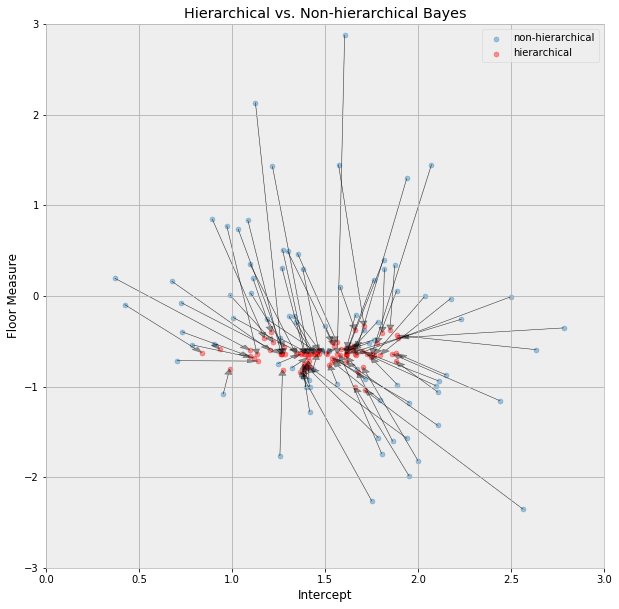

In [111]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, xlabel='Intercept', ylabel='Floor Measure',
                     title='Hierarchical vs. Non-hierarchical Bayes',
                     xlim=(0, 3), ylim=(-3, 3))

ax.scatter(indv_a, indv_b, s=26, alpha=0.4, label = 'non-hierarchical')
ax.scatter(hier_a,hier_b, c='red', s=26, alpha=0.4, label = 'hierarchical')
for i in range(len(indv_b)):
    ax.arrow(indv_a[i], indv_b[i], hier_a[i] - indv_a[i], hier_b[i] - indv_b[i],
             fc="k", ec="k", length_includes_head=True, alpha=0.4, head_width=.04)
ax.legend();

在上方的收缩图中，我们显示了每个县的非后验均值（蓝色）和后验均值（红色）的系数。为了显示收缩对单个系数对（α和β）的影响，我们用箭头连接了属于同一县的蓝点和红点。一些非分层的后验太远了，以至于我们无法在此图中显示它们（这会使轴太宽）。有趣的是，平面图的所有分层后验似乎都在-0.6左右，这表明几乎所有县都设有地下室是提高氡含量的明显指标。截距（我们针对土壤类型采取的截距）在各县之间似乎有所不同。如果我们仅使用非分层模型，则很难找到此信息。

至关重要的是，当我们考虑群体分布时，在非分层模型中看起来很大且很重要的许多结果实际上要小得多（这一点也可以在Chris'NB中的In [12]中看到） 。因此，收缩率可以看作是一种智能正则化形式，有助于减少假阳性！

### 与频率统计的联系¶
这种类型的分层的部分池化模型在统计学术语中被称为随机效应模型（在统计中，随机效应模型（也称为方差成分模型）是一种分层线性模型。 它假定要分析的数据是从不同总体的层次结构中抽取的，这些层次结构的差异与该层次结构有关。 在计量经济学中，当人们不假定固定效应（允许单个效应）时，将随机效应模型用于层次或面板数据的分析。 随机效应模型是固定效应模型的特例。）。 有趣的是，如果我们在上述模型的组均值和方差上采用统一的先验，则得出的贝叶斯模型将等同于随机效应模型。 可能会想到，具有统一或较宽的正常超优先级的模型之间的差异不应产生巨大影响。 但是，盖尔曼说，鼓励使用弱信息先验（如我们上面所做的那样），而不是使用扁平先验。

### 摘要¶
在本篇由Danne Elbers共同撰写的文章中，我们展示了当我们期望有相似的多组测量值时，多层分层贝叶斯模型如何在两个方面都做到最好。幼稚的方法要么将所有数据汇总在一起，要么忽略各个差异，或者将每个集合视为完全独立的集合，从而导致噪声估计，如上所示。通过假设每个单独的数据集（在我们的例子中为每个县）均根据组分布进行分布（我们同时进行估算），我们将受益于统计功能的增强和收缩效应的智能化。然后，PyMC3中的概率编程使该模型的贝叶斯估计变得微不足道。

作为后续措施，我们还可以将其他州纳入模型。为此，我们可以在层次结构中添加另一个层，每个州都在国家/地区级别汇集。最后，我博客的读者会注意到我们这里没有使用glm（），因为它在分层模型中还不能很好地发挥作用。